In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

from pylab import rcParams

LABELS = ["Normal", "Fraude"]

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

In [2]:
df = pd.read_csv("creditcard.csv")

### 1. Regresión Logística

In [3]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [4]:
X = np.array(df.iloc[:,1:-1])
y = np.array(df['Class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
#Inicializamos el clasificador
clf = LogisticRegression(random_state=0,max_iter=1000)

#Entrenamos el modelo con los datos
clf.fit(X_train, y_train)

#Predicción sobre el test
y_pred=clf.predict(X_test)

In [15]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85284    12]
 [   56    91]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [16]:
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_pred)

In [17]:
print('roc_auc_score for Logistic Regression Desbalanceado: ', roc_auc_score(y_test, y_pred))

roc_auc_score for Logistic Regression Desbalanceado:  0.8094534662486266


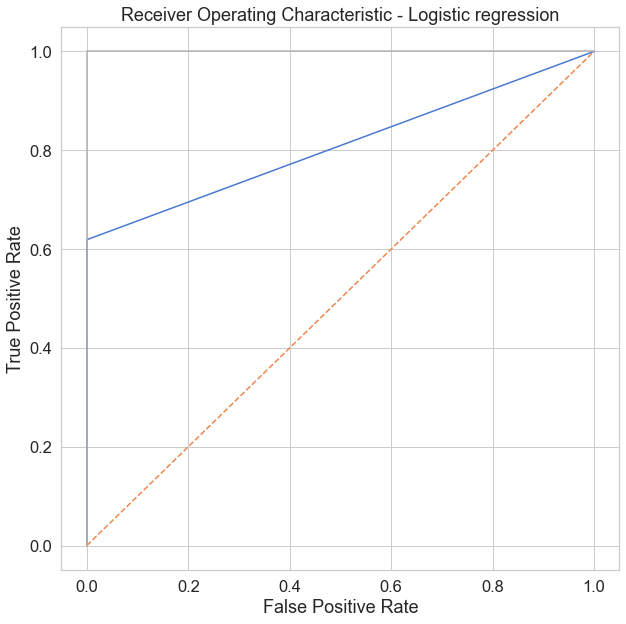

In [18]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Balanceamos datos

In [5]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

Text(0, 0.5, 'Frecuencia')

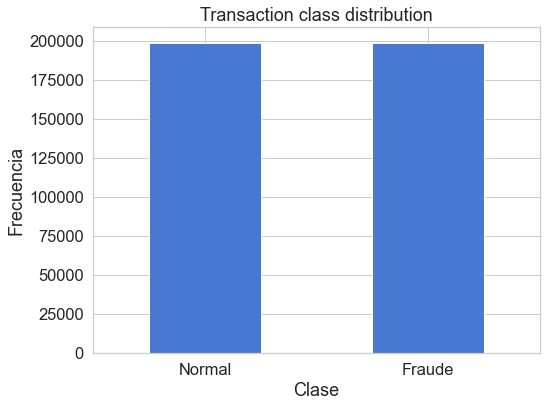

In [20]:
df2 = pd.DataFrame(y_res, columns =['Class'])

count_classes = pd.value_counts(df2['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0, figsize=(8,6))
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Clase")
plt.ylabel("Frecuencia")

### Regresión logistica con datos balanceados

In [21]:
clf1 = LogisticRegression(random_state=0,max_iter=1000)

clf1.fit(X_res, y_res)

y_pred1=clf1.predict(X_test)

print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[83889  1407]
 [   15   132]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.09      0.90      0.16       147

    accuracy                           0.98     85443
   macro avg       0.54      0.94      0.57     85443
weighted avg       1.00      0.98      0.99     85443



In [22]:
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_pred1)

In [23]:
print('roc_auc_score for Logistic Regression Balanceado: ', roc_auc_score(y_test, y_pred1))

roc_auc_score for Logistic Regression Balanceado:  0.9407318428215407


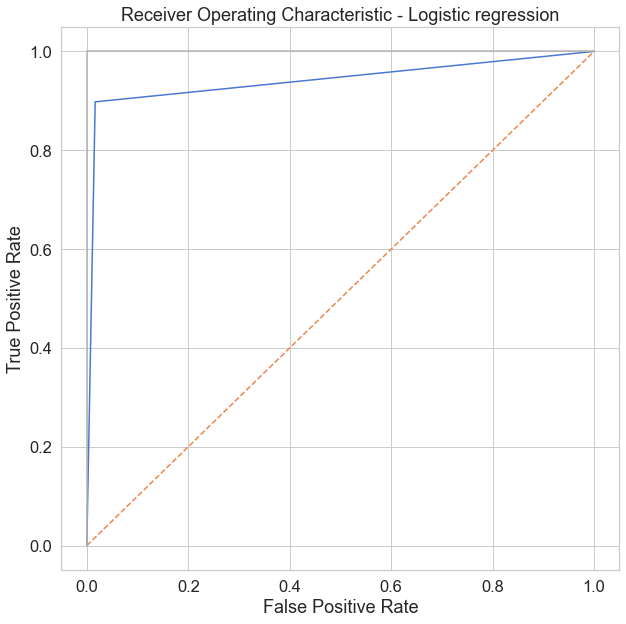

In [24]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 2. KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Knn balanceado

In [7]:
clasificador = KNeighborsClassifier(n_neighbors=2)
clasificador.fit(X_res, y_res)
yhat3 = clasificador.predict(X_test)

In [8]:
print(confusion_matrix(y_test, yhat3))
print(classification_report(y_test, yhat3))

[[85213    83]
 [   30   117]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.58      0.80      0.67       147

    accuracy                           1.00     85443
   macro avg       0.79      0.90      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [9]:
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, yhat3)

In [10]:
print('roc_auc_score for KNN balanceado: ', roc_auc_score(y_test, yhat3))

roc_auc_score for KNN balanceado:  0.8974726426867877


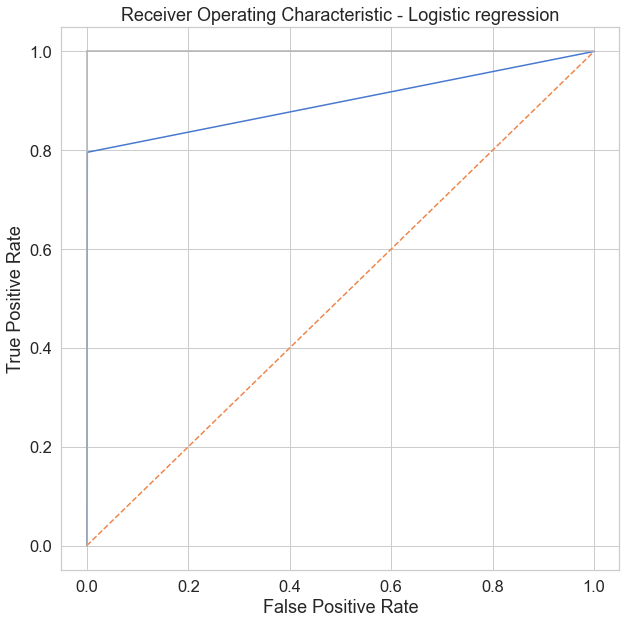

In [11]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate5, true_positive_rate5)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()